# L3 Forward Kinematics

*License: CC-BY-NC-SA 4.0*

*Author: Murilo M. Marinho (murilo.marinho@manchester.ac.uk)*

## Pre-requisites for the learner
The user of this notebook is expected to have prior knowledge in
- All the content and pre-requisites of lessons 1 and 2.

## I found an issue
Thank you! Please report it at https://github.com/MarinhoLab/OpenExecutableBooksRobotics/issues

#### Latex Macros
$\providecommand{\myvec}[1]{{\mathbf{\boldsymbol{{#1}}}}}$
$\providecommand{\mymatrix}[1]{{\mathbf{\boldsymbol{{#1}}}}}$

# Pre-requisites

In [ ]:
%%capture
%pip install numpy
%pip install numpy --break-system-packages

# Imports

In [ ]:
import numpy as np
from math import pi, sin, cos

# Forward Kinematics Model (FKM)

The forward kinematics model of a rigid serial-link manipulator is obtained through a sequence of transformations.

The only real challenge in obtaining the FKM is understanding from a diagram, or a real robot, what transformations represent the robot and in what order they happen.

Anyway, we can start with an example.

![Lesson4.png](Lesson4.png)

Consider the 2-DoF planar robot shown in the figure. It is classed as an RR robot, because the two joints are revolute.

Let $q_0\triangleq q_0(t) \in \mathbb{R}$ and $q_1\triangleq q_1(t) \in \mathbb{R}$ compose its configuration space. In addition, let $l_{0} \in \mathbb{R}$ and $l_{1} \in \mathbb{R}$ be the geometric parameters, which are quantities that cannot be controlled.

The configuration space is what is used in practice to control the robot. You as the system designer will send configuration space values $q_0$ and $q_1$, or other signals related to those, to command the robot. You will make it move to perform a relevant task and hopefully earn your next month's salary. The parameters $l_{0}$ and $l_{1}$ are constant in time and represent time-invariant geometrical aspects of the robot, such as link lengths, that you cannot control.

As a representative task for robotic manipulators, let us use the configuration space and geometric parameters to calculate the pose of the frame of the tip of the robot. This is represented mathematically as follows.

$$\mymatrix{H}^{0}_{2}( q_0, l_{0},q_1,l_{1}) \in SE(2).$$

The equation for the end-effector (tip) pose is what is called the forward kinematics model (FKM). We need this frequently when using a robotic manipulator because the end effector is likely to be its most useful part. For instance, it could be a gripper that is used to pick and place objects. To pick or place and object, the robot needs to move somewhere.

The first step towards moving somewhere is knowing where you are. Thence, the first step towards controlling a robotic manipulator's end effector pose in any meaningful way is to obtain its FKM.

## Understanding the problem

The FKM is a mathematical description of the robot. Before we attempt any programming, we have to mathematically describe the sequential transformations that represent the robot being modeled.

As shown in the figure, there are four transformations for this robot, taking us from the base, $\mathcal{F}_0$, to the end-effector, $\mathcal{F}_2$. The sequence can be summarised as follows.

1. A rotation by $q_0$, from $\mathcal{F}_0$ to $\mathcal{F}_{0'}$.
2. A translation of $l_0$ along the $x$-axis of the previous frame, from $\mathcal{F}_{0'}$ to $\mathcal{F}_{1}$.
3. A rotation by $q_1$, from $\mathcal{F}_{1}$ to $\mathcal{F}_{1'}$.
4. A translation of $l_1$ along the $x$-axis of the previous frame, from $\mathcal{F}_{1'}$ to $\mathcal{F}_{2}$.

### 1. From $\mathcal{F}_0$ to $\mathcal{F}_{0'}$

We start with the rotation that can be described by the following homogenous transformation matrix.

$$\myvec H_{0'}^{0}\left(q_0\right)	=\begin{bmatrix}\mymatrix R\left(q_0\right) & 0\\
\myvec 0 & 1
\end{bmatrix}.$$

Programmatically, supposing that $q_0 = \frac{\pi}{4}$, we arrive at the following piece of code.
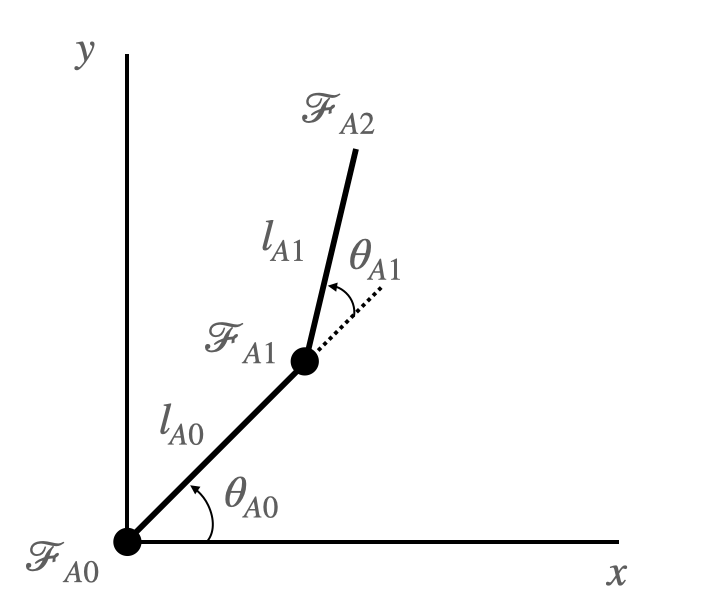

In [ ]:
H_0_0p = np.array(
        [[cos(pi/4), -sin(pi/4),  0],
         [sin(pi/4),  cos(pi/4),  0],
         [0,         0,           1]]
)

print(f"The first transformation is\n\n H_0_0p = \n{H_0_0p}")

### 2. From $\mathcal{F}_{0'}$ to $\mathcal{F}_{1}$

The second step is a translation that can be described by the following homogenous transformation matrix.

$$\myvec H_{1}^{0'}\left(l_0\right)	=\begin{bmatrix}\mymatrix I & \begin{bmatrix}l_0\\
0
\end{bmatrix}\\
\myvec 0 & 1
\end{bmatrix}.$$

Programmatically, supposing that $l_0 = 0.3$, we arrive at the following piece of code.

In [ ]:
H_0p_1 = np.array(
        [[1, 0, 0.3],
         [0, 1, 0],
         [0, 0, 1]]
)

print(f"The second transformation is\n\n H_0p_1 = \n{H_0p_1}")

### 3. From $\mathcal{F}_{1}$ to $\mathcal{F}_{1'}$

The third step is a rotation that can be described by the following homogenous transformation matrix.

$$\myvec H_{1'}^{1}\left(q_1\right)	=\begin{bmatrix}\mymatrix R\left(q_1\right) & 0\\
\myvec 0 & 1
\end{bmatrix}.$$

Programmatically, supposing that $q_1 = -\frac{\pi}{14}$, we arrive at the following piece of code.

In [ ]:
H_1_1p = np.array(
        [[cos(-pi/14), -sin(-pi/14),  0],
         [sin(-pi/14),  cos(-pi/14),  0],
         [0,         0,           1]]
)

print(f"The third transformation is\n\n H_1_1p = \n{H_1_1p}")

### 4. From $\mathcal{F}_{1'}$ to $\mathcal{F}_{2}$

The last step is a translation that can be described by the following homogenous transformation matrix.

$$\myvec H_{2}^{1'}\left(l_1\right)	=\begin{bmatrix}\mymatrix I & \begin{bmatrix}l_1\\
0
\end{bmatrix}\\
\myvec 0 & 1
\end{bmatrix}.$$

Programmatically, supposing that $l_1 = 0.95$, we arrive at the following piece of code.

In [ ]:
H_1p_2 = np.array(
        [[1, 0, 0.95],
         [0, 1, 0],
         [0, 0, 1]]
)

print(f"The second transformation is\n\n H_1p_2 = \n{H_1p_2}")

## Ok, so where's the FKM?

As we summarised earlier, the planar RR robot used in this lesson is composed of four sequential transformations. We obtained each of them individually, therefore the final step for the FKM is to compose them in sequence.

$$\mymatrix{H}^{0}_{2}( q_0, l_{0},q_1,l_{1}) = \myvec H_{0'}^{0}\left(q_0\right)\myvec H_{1}^{0'}\left(l_0\right)\myvec H_{1'}^{1}\left(q_1\right)\myvec H_{2}^{1'}\left(l_1\right).$$

The equation above is general and is the FKM for this robot.

Programmatically, we will compute the FKM at a given configuration. Using the configuration and parameters defined previously, we arrive at the following piece of code.

In [ ]:
H_0_2 = H_0_0p @ H_0p_1 @ H_1_1p @ H_1p_2

print(f"The FKM for the RR robot at the specified configuration is\n\n H_0_2 = \n{H_0_2}")

# Denavit-Hartenberg (DH) Parameters

Despite being the most mistyped concept in my career, DH parameters are ubiquitous and frequently used to describe commercial robots.

The process can be divided into two major parts, with different levels of difficulty.
1. Obtaining the DH parameters for a given robot.
2. Using given DH parameters to obtain the robot's FKM.

Obtaining the DH parameters of a robot usually requires some thought, in particular if the robot has many degrees-of-freedom. This is not the objective of this lesson, because that does not involve programming. It is a pen-and-paper exercise.

After the DH parameters are obtained, calculating the FKM of the robot is trivial.

## DH parameter table for an RR robot

Let us start with a sample table, shown below.

| Joint | $\theta$ | $d$     | $a$ | $\alpha$ |
|-------|----------|---------|-----|----------|
| 0     | $q_0(t)$ | $l_{0}$ | 0   | 0        |
| 1     | $q_1(t)$ | $l_{1}$ | 0   | 0        |

Each joint transformation is represented by a row. The transformations of each row will be done in the following sequence.

1. A rotation about the $z$-axis.
2. A translation about the $z$-axis.
3. A translation about the $x$-axis.
4. A rotation about the $x$-axis.

Note that the sequence of transformations in the table represent the same FKM of our RR robot derived previously. The only difference is that the result will be an element of SE(3).

## DH parameter table for a PP robot

Instead of working again on the RR robot, let's derive the FKM for a PP robot, composed of two prismatic joints. Let its configuration be composed of $q_{B0}(t)$ and $q_{B1}(t)$, with different subscripts to differentiate from the RR robot.

Consider that the FKM is represented by the table below.

| Joint | $\theta$ | $d$         | $a$ | $\alpha$        |
|-------|----------|-------------|-----|-----------------|
| 0     | 0        | $q_{B0}(t)$ | 0   | $\frac{\pi}{2}$ |
| 1     | 0        | $q_{B1}(t)$ | 0   | 0               |

Given that we can ignore any cells with zeros, this robot will be composed of three transformations.
1. A translation of $q_{B0}(t)$ along the $z$-axis, from $\mathcal{F}_{B0}$ to $\mathcal{F}_{B0'}$.
2. A rotation of $\frac{\pi}{2}$ about the $x$-axis, from $\mathcal{F}_{B0'}$ to $\mathcal{F}_{B1}$.
3. A translation of $q_{B1}(t)$ along the $z$-axis, from $\mathcal{F}_{B1}$ to $\mathcal{F}_{B2}$.

Using elements of SE(3), we obtain the FKM of this robot as follows.

$$
\mymatrix{H}^{B0}_{B2}(q_{B0},q_{B1})=
\left[\begin{array}{ccc}
        1  & 0 & 0 & 0 \\
        0  & 1 & 0 & 0 \\
        0  & 0 & 1 & q_{B0}(t) \\
        0  & 0 & 0 & 1
\end{array}\right]
\left[\begin{array}{ccc}
        1   & 0 & 0 & 0\\
        0   &  \cos{\frac{\pi}{2}}  & -\sin{\frac{\pi}{2}} & 0\\
        0  & \sin{\frac{\pi}{2}}  & \cos{\frac{\pi}{2}} & 0\\
        0  & 0             & 0            & 1
\end{array}\right]
\left[\begin{array}{ccc}
        1  & 0 & 0 & 0 \\
        0  & 1 & 0 & 0 \\
        0  & 0 & 1 & q_{B1}(t) \\
        0  & 0 & 0 & 1
\end{array}\right]
.$$

Programmatically, suppose $q_{B0}=0.2$ and $q_{B1}=0.3$. We obtain the following piece of code.

In [ ]:
q_B0 = 0.2
q_B1 = 0.3
theta_B0 = pi/2.0

H_B0_B0p = np.array(
          [[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, q_B0],
           [0, 0, 0, 1]]
)

H_B0p_B1 = np.array(
          [[1, 0, 0, 0],
           [0, cos(theta_B0), -sin(theta_B0), 0],
           [0, sin(theta_B0),  cos(theta_B0), 0],
           [0, 0, 0, 1]]
)

H_B1_B2 = np.array(
          [[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, q_B1],
           [0, 0, 0, 1]]
)

# FKM
H_B0_B2 = H_B0_B0p @ H_B0p_B1 @ H_B1_B2

print(f"The FKM for the PP robot at the specified configuration is\n\n H_B0_B2 = \n{H_B0_B2}")

# Exercises
1. What if the robot is RP, that is, has a prismatic joint?
2. What about an RRR robot?

# Extra challenge(s)
1. What about if the robot had `n` degrees-of-freedom?
